In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(5664, 4248)

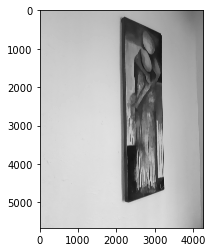

In [2]:
imgnormal = cv2.imread("./files/leija.jpg")
img = cv2.cvtColor(imgnormal, cv2.COLOR_BGR2GRAY)
imgcol = cv2.cvtColor(imgnormal, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap="gray")
img.shape

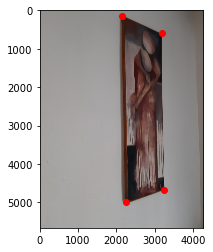

In [3]:
plt.imshow(imgcol)
plt.scatter([2150, 3180, 2250, 3240],[150,600,5000, 4680], color="red")

[[ 9.40442068e-01 -1.93905581e-02 -2.01904186e+03]
 [-3.30402806e-01  7.41570742e-01  5.99130421e+02]
 [-1.18226858e-04  1.68449532e-06  1.00000000e+00]]


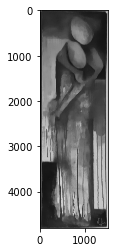

In [4]:
pts_src = np.array([[2150,150],[3160,600],[2250,5000],[3240,4680]])
h = 4800
w = 1500
pts_dst = np.array([[0,0],[w,0],[0,h],[w,h]])
mat, _ = cv2.findHomography(pts_src, pts_dst)
print(mat)
img2 = cv2.warpPerspective(img, mat, (w,h))

plt.imshow(img2, cmap="gray")

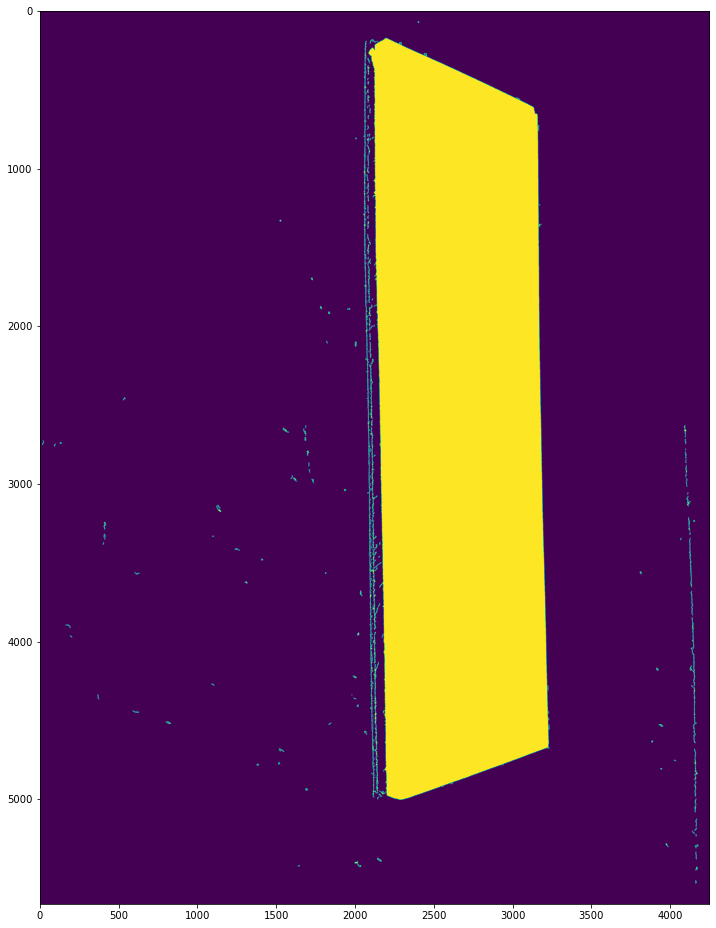

In [17]:
plt.figure(figsize=(12,24))
gauss = cv2.GaussianBlur(img, (11,11),0)
imcanny = cv2.Canny(gauss, 0, 20)
bordes_gordos = cv2.dilate(imcanny, None)
contornos, _ = cv2.findContours(bordes_gordos, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
maxcnt = [max(contornos, key=cv2.contourArea)]
im2 = bordes_gordos.copy()
im2 = cv2.drawContours(im2, maxcnt, -1, 255, thickness = -1)
plt.imshow(im2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

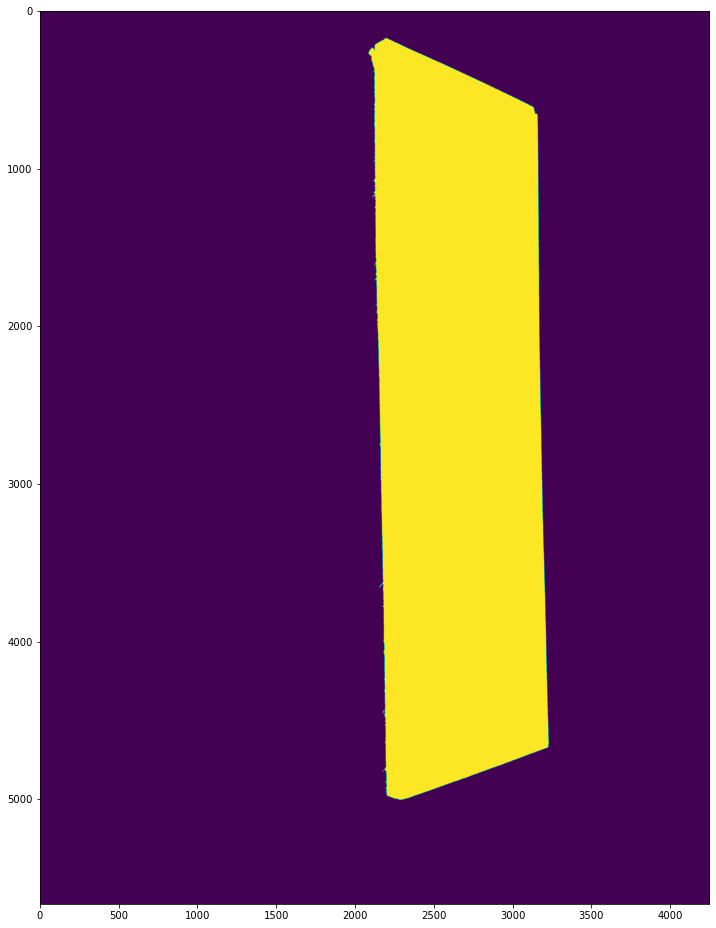

In [26]:
plt.figure(figsize=(12,24))
componentes = cv2.connectedComponentsWithStats(im2, 4, cv2.CV_32S)
cant_obj = componentes[0]
etiquetas = componentes[1]
stats = componentes[2]

mascara = np.uint8(255*[np.argmax(stats[:,4][1:])+1 == etiquetas])

plt.imshow(mascara[0])
mascara[0]

((2661.489013671875, 2578.43896484375), (1064.5947265625, 4831.07568359375), -1.1663802862167358)
[[2178 5004]
 [2080  174]
 [3144  152]
 [3242 4982]]


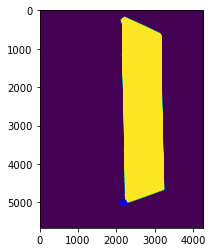

In [37]:
#cnt_limpios, _ = cv2.findContours(mascara[0], )  
rect = cv2.minAreaRect(maxcnt[0])
print(rect)
box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)

plt.imshow(mascara[0])
xs = box.flatten()[::2]
ys = box.flatten()[1::2]

plt.scatter(xs[0],ys[0], color="blue")

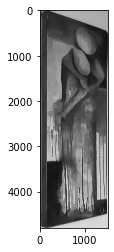

In [39]:
pts_src = np.array([box[1],box[2],box[0],box[3]])
h = 4800
w = 1500
pts_dst = np.array([[0,0],[w,0],[0,h],[w,h]])
mat, _ = cv2.findHomography(pts_src, pts_dst)
img2 = cv2.warpPerspective(img, mat, (w,h))
plt.imshow(img2, cmap="gray")

In [51]:
vertices = cv2.goodFeaturesToTrack(img, 4, 0.01, 1000)
vertices.flatten()

array([2649., 4545., 2383., 2950., 3130., 3658., 3137.,  651.],
      dtype=float32)

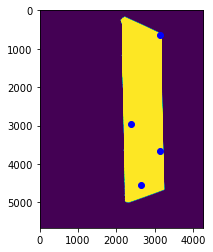

In [53]:
x = vertices[:,0,0]#vertices.flatten()[::2]
y = vertices[:,0,1]

plt.imshow(mascara[0])
plt.scatter(x,y, color="blue")

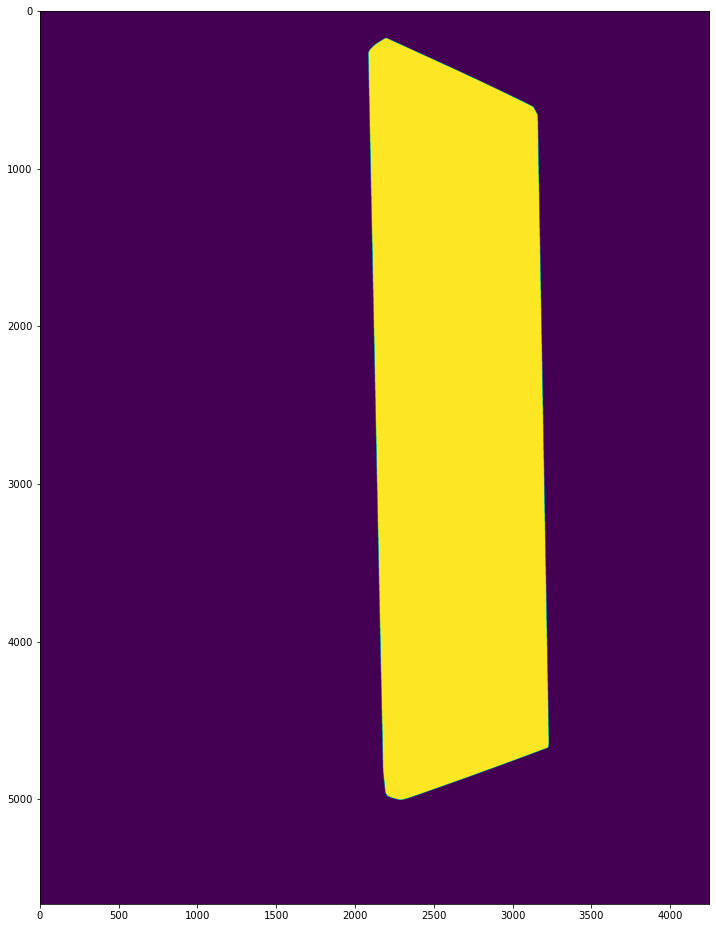

In [70]:
contornos2, _ = cv2.findContours(mascara[0], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contornos2[0]
hull = cv2.convexHull(cnt)
plt.figure(figsize=(12,24))
puntos_convex = hull[:,0,:]
imzeros = np.zeros(mascara[0].shape)
mascara_convex = np.uint8(cv2.fillConvexPoly(imzeros,puntos_convex, 1))
plt.imshow(mascara_convex)

(4, 1, 2)

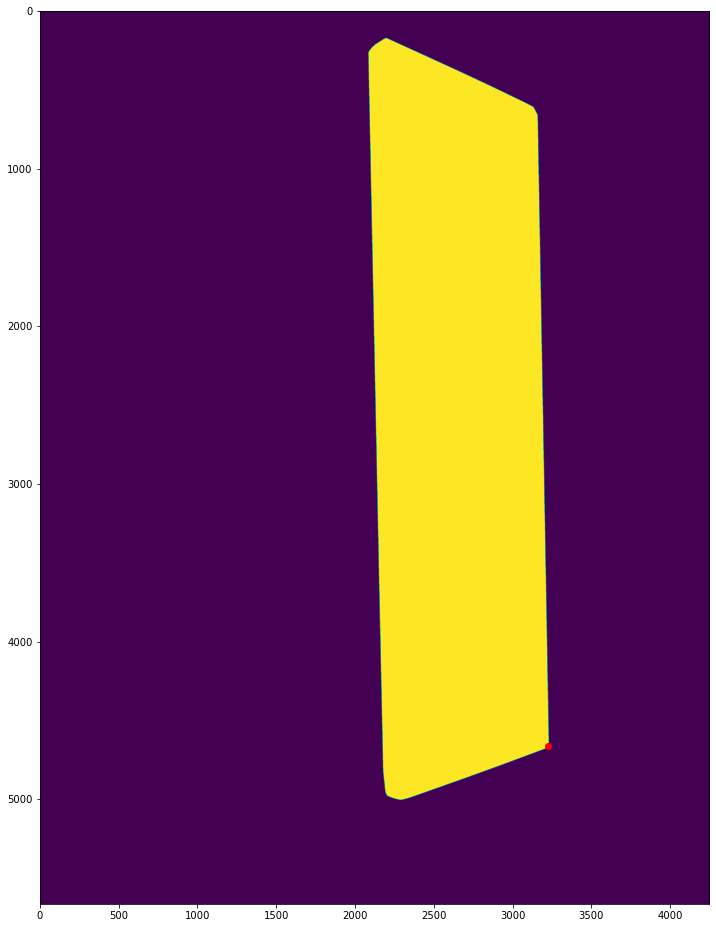

In [78]:
plt.figure(figsize=(12,24))
epsilon = 0.01 * cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
xdp = approx[:,0,0]
ydp = approx[:,0,1]
box = approx[:,0]
plt.imshow(mascara_convex)
plt.scatter(xdp[2],ydp[2], color="red")
approx.shape

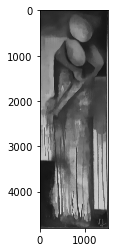

In [80]:
pts_src = np.array([box[0],box[3],box[1],box[2]])
h = 4800
w = 1500
pts_dst = np.array([[0,0],[w,0],[0,h],[w,h]])
mat, _ = cv2.findHomography(pts_src, pts_dst)
img2 = cv2.warpPerspective(img, mat, (w,h))
plt.imshow(img2, cmap="gray")